In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [3]:
conn = sqlite3.connect('data.db')
table1 = "trail2-2024-03-25_13-54-34"
table2 = "time_cnt"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name,average_time FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,average_time
0,cb794e75-d657-4c65-ba96-8d61d94b255b,diaspora,8,100,0,noop,0.001572
1,f6c666ff-41b0-4c56-9d0a-287935ddd108,diaspora,8,100,1,noop,0.001798
2,484a4924-fbc5-4e11-8346-115eeafa23c5,diaspora,8,100,0,sleep10ms,0.000516
3,fe348c62-3ad2-4e5c-8c73-bb1eb735df4c,diaspora,8,100,1,sleep10ms,0.002034
4,073c382d-84cf-40c4-a5c5-f14de1fecd42,diaspora,8,100,0,sleep100ms,0.000353
5,aec8ad9b-64ee-40a1-aaea-ce1acc293abb,diaspora,8,100,1,sleep100ms,0.002080
6,05f20e0a-0323-4d3f-afff-340a1803c195,diaspora,64,100,0,noop,0.001034
7,eb35a247-f331-43e9-a5f6-2a36c7617751,diaspora,64,100,1,noop,0.000347
8,a8f3bb9f-9b6f-419d-a668-be9cc8126983,diaspora,64,100,0,sleep10ms,0.000683
9,06605037-6d64-44cf-9599-ac7515d1145f,diaspora,64,100,1,sleep10ms,0.000651


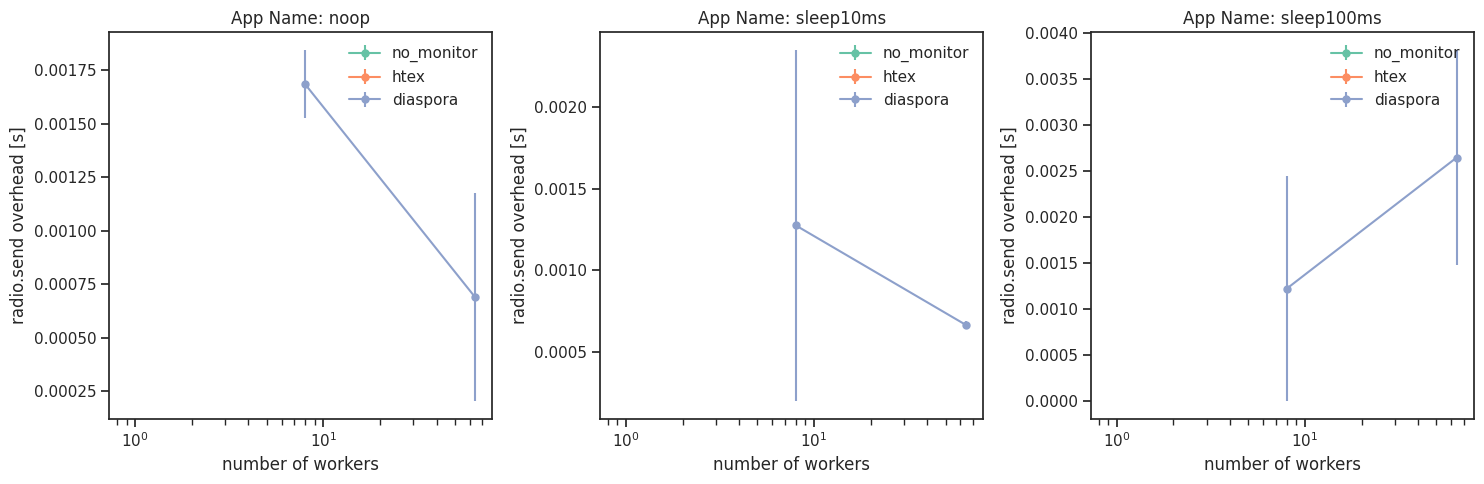

In [5]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')